Multivariable LinReg Here

## Overview

This notebook aims to analyze the Ames Housing dataset and build predictive models for housing prices. The notebook is organized into several sections, each focusing on a different aspect of the data analysis and modeling process. The primary goal is to provide a comprehensive understanding of the factors influencing house prices and to develop robust predictive models.

## I. Exploratory Data Analysis


### 1. Get to know the data & Basic Statistics

-   Display the first few rows and summary statistics.
-   List the column names.
-   List the number of columns and rows. 


### 2. Univariate Analysis

Examine the distribution and characteristics of individual variables.

- **Histograms**: Visualize the distribution of numerical features.
- **Box Plots**: Identify outliers and understand the spread of numerical features.


### 3. Bi-variate Analysis

Explore the relationships between pairs of variables.

- **Correlation Heatmap**: Identify strong relationships between features and the target variable.
- **Scatter Plots**: Visualize the relationships between selected features and SalePrice.


### 4. Multivariate Analysis

Examine the relationships between multiple variables simultaneously to identify patterns and interactions that may not be evident in univariate or bi-variate analyses.



## II. Data Preparation
Data preparation involves handling missing values, encoding categorical variables, and selecting relevant features for modeling.

1. **Handling Missing Values**: Missing data is imputed using appropriate strategies to ensure completeness of the dataset.
2. **Encoding Categorical Variables**: Categorical variables are encoded using one-hot encoding to make them suitable for modeling.
3. **Removing Outliers**: Outliers are identified and removed based on the distribution of key features to ensure the dataset is not skewed by extreme values.
4. **Standardizing/Scaling**: The target variable SalePrice is standardized to normalize its distribution and improve model performance.

## III. Feature Analysis & Modeling

- Split the data into training and testing sets.
- Train Models
- Evaluate Models


### 1. Baseline Linear Regression Models

Build baseline linear regression models to understand linear relationships between features and SalePrice.


### 2. Advanced Regression Analysis
Advanced regression techniques are employed to improve the predictive performance of the models.

1. **Ridge Regression**: A regularized regression technique to handle multicollinearity and prevent overfitting.
2. **Lasso Regression**: Another regularized regression technique that performs feature selection by shrinking some coefficients to zero.
3. **ElasticNet Regression**: A combination of Ridge and Lasso regression that balances their strengths.


### 3. Model Training and Validation
Various machine learning models are trained and validated to predict housing prices.

1. **Support Vector Regression (SVR)**: A robust regression technique that aims to minimize prediction errors.
2. **Artificial Neural Networks (ANN)**: A deep learning approach that captures complex patterns in the data.
3. **XGBoost**: An ensemble learning method that builds multiple weak learners to create a strong predictive model.

## IV. Ensemble Modeling
Ensemble modeling combines multiple models to improve overall prediction accuracy.

1. **Stacking Models**: Different models are stacked to leverage their individual strengths.
2. **Blending Models**: Predictions from multiple models are blended to achieve better performance.

## V. Prediction
The final models are used to make predictions on the test data, and the results are evaluated to determine the best-performing model.

## VI. Goals
- **Identify Key Features**: Determine the most important features influencing housing prices.
- **Build Robust Models**: Develop and validate different regression models to accurately predict housing prices.
- **Improve Predictive Accuracy**: Use advanced techniques and ensemble methods to enhance the performance of the predictive models.

This analysis will provide insights into the factors affecting housing prices in Ames and demonstrate the application of various machine learning techniques to build effective predictive models.


First few rows of the dataset:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL           78    10140   Pave   NaN      Reg   
1          20       RL           88    12803   Pave   NaN      IR1   
2          60       RL           86    11839   Pave   NaN      Reg   
3          90       RL           75     8235   Pave   NaN      Reg   
4          20       RL           60     9060   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      648     Fa  GdPrv         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      1    20

C:\Users\odpol\AppData\Local\Temp\ipykernel_49404\2836107248.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ames_df['MasVnrArea'].replace('nan', 0, inplace=True)


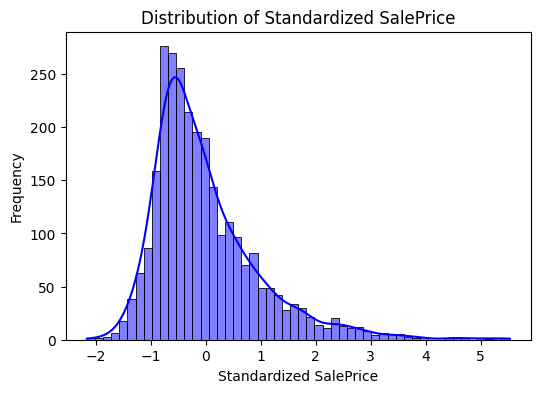

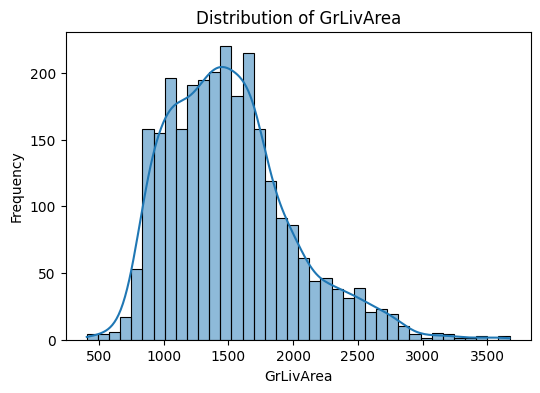

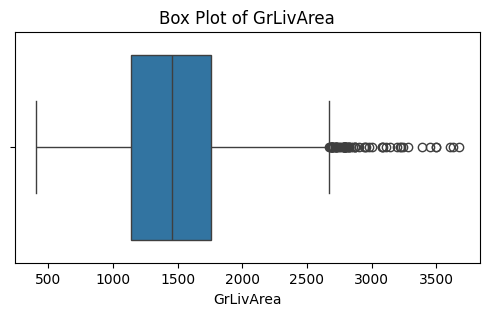

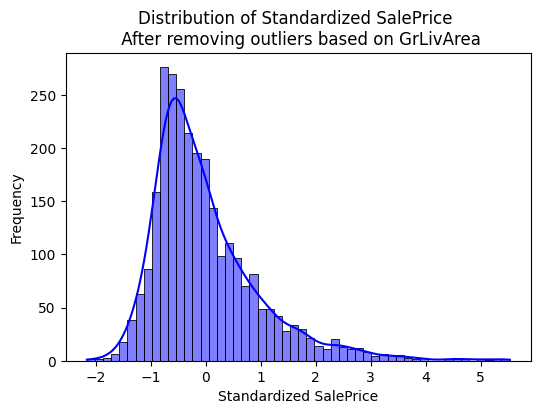

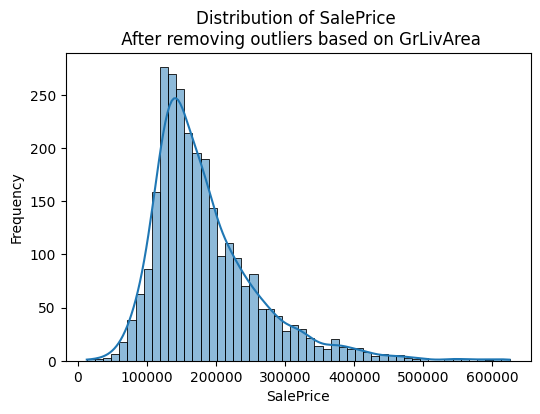

First few rows of the dataset after preprocessing:
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20           78    10140            6            6       1974   
1          20           88    12803            7            5       2002   
2          60           86    11839            7            5       1990   
3          90           75     8235            5            4       1977   
4          20           60     9060            5            6       1957   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0          1999        99.0         663         377  ...         False   
1          2002        99.0         922           0  ...         False   
2          1990        99.0        1085           0  ...         False   
3          1977        99.0         483           0  ...         False   
4          2006        98.0           0           0  ...         False   

   SaleType_Oth  SaleType_VWD  SaleType_WD  Sal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Display the first few rows and summary statistics
print("First few rows of the dataset:")
print(ames_df.head())

print("\nSummary statistics of the dataset:")
print(ames_df.describe())

# List the column names and the number of rows and columns
print("\nColumn names in the dataset:")
print(ames_df.columns.tolist())

num_rows, num_columns = ames_df.shape
print(f"\nThe dataset contains {num_rows} rows and {num_columns} columns.")

# Identify and handle missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])

# Replace specific missing values in 'MasVnrArea' with 0
ames_df['MasVnrArea'].replace('nan', 0, inplace=True)

# Separate numerical and categorical columns with missing values
num_cols_with_missing = ames_df.select_dtypes(include=[np.number]).columns[ames_df.select_dtypes(include=[np.number]).isnull().any()].tolist()
cat_cols_with_missing = ames_df.select_dtypes(exclude=[np.number]).columns[ames_df.select_dtypes(exclude=[np.number]).isnull().any()].tolist()

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
ames_df[num_cols_with_missing] = num_imputer.fit_transform(ames_df[num_cols_with_missing])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
ames_df[cat_cols_with_missing] = cat_imputer.fit_transform(ames_df[cat_cols_with_missing])

# Ensure no missing values remain
assert ames_df.isnull().sum().sum() == 0, "There are still missing values in the dataset"

# Encode categorical variables using one-hot encoding
ames_df = pd.get_dummies(ames_df, drop_first=True)

# Standardize 'SalePrice'
ames_df['SalePrice_scaled'] = StandardScaler().fit_transform(ames_df['SalePrice'].values.reshape(-1, 1))

# Remove outliers based on 'GrLivArea'
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Plot the standardized SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice_scaled'], kde=True, color= 'blue')
plt.title('Distribution of Standardized SalePrice')
plt.xlabel('Standardized SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'GrLivArea'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Visualize 'GrLivArea' with outliers highlighted
plt.figure(figsize=(6, 3))
sns.boxplot(x=ames_df['GrLivArea'])
plt.title('Box Plot of GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

# Removing Outliers based on 'GrLivArea'
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Plot the standardized SalePrice after removing outliers
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice_scaled'], kde=True, color='blue')
plt.title('Distribution of Standardized SalePrice \n After removing outliers based on GrLivArea')
plt.xlabel('Standardized SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice \n After removing outliers based on GrLivArea')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Display the first few rows of the dataset to verify changes
print("First few rows of the dataset after preprocessing:")
print(ames_df.head())


Feature Analysis & Modeling Section

Split the Data

In [3]:
# Split the data into training and testing sets
X = ames_df.drop(['SalePrice', 'SalePrice_scaled'], axis=1)
y = ames_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(f"\nTraining set: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Testing set: {X_test.shape[0]} rows, {X_test.shape[1]} columns")



Training set: 2211 rows, 257 columns
Testing set: 553 rows, 257 columns


Baseline Linear Regression Model

Baseline Linear Regression Model Performance:
Mean Absolute Error (MAE): 13874.373570130374


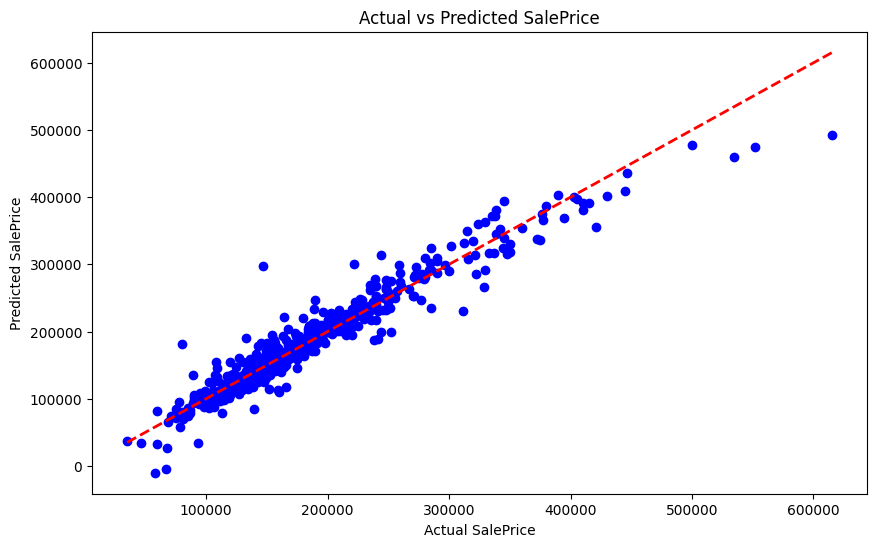

Regression Coefficients: [-5.42837103e+01  4.47148490e+01  8.31272059e-01  6.94141542e+03
  6.06817491e+03  3.56582043e+02  4.48251295e+01  1.43516224e+01
  1.56896228e+01  8.78316902e+00 -4.36879170e+00  2.01039611e+01
  1.91162711e+01  2.36722320e+01 -1.54283724e+00  4.12457160e+01
  1.92538868e+03 -1.11017963e+03  3.20322464e+03  1.09425383e+03
 -5.10199097e+03 -2.09056689e+04  6.01835624e+02  2.79133078e+03
 -1.87313714e+00  2.61023389e+03  1.76752202e+01  8.93833601e+00
  4.65024994e+00  1.79334799e+01  1.65994044e+00  4.26791931e+01
 -3.21112252e+01  5.53995044e-01 -2.38008860e+02 -4.06174251e+02
 -1.35338414e+04  7.16667838e+03 -2.59314571e+03  1.31229907e+04
  7.24129750e+03  8.10605763e+02  3.00562517e+04 -2.92068707e+03
  3.57119485e+03 -9.33696417e+01 -5.02869735e+02  4.28224156e+03
 -1.30917122e+04 -7.14200432e+02 -1.69890533e+04 -3.28992569e+04
  4.74180704e+03 -5.18504685e+03 -1.44798244e+03  1.66975644e+03
  2.76264201e+03 -4.15399999e+04  1.03614931e+04  6.66161091e+03


In [4]:
# Baseline Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Baseline Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Print the regression coefficients
print(f"Regression Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")


Random Forest Regressor Model

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 15361.025220012054
Mean Squared Error (MSE): 560762950.1595995


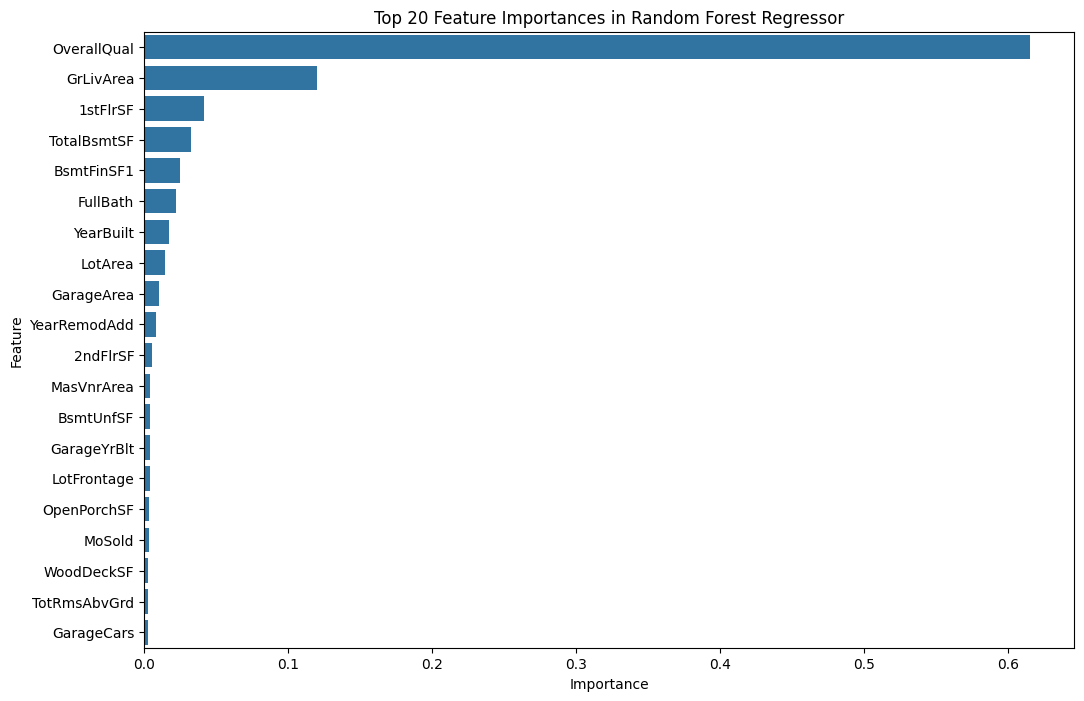

In [5]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")

# Feature importance plot
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))
plt.title('Top 20 Feature Importances in Random Forest Regressor')
plt.show()
